# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #FDD20; text-align: center; line-height: 0.75;background-color: #F95835"><b>Heart Attack Prediction</b><br></h1>

### Problem Statement :

With a plethora of medical data available and the rise of Data Science, a host of startups are taking up the challenge of attempting to create indicators for the forseen diseases that might be contracted! Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. In this way, we try to solve automate another problem that occurs in the nature with a view to counter it and focus on to the next problem with the help of AI techniques!

### Dataset Attributes

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack


### Import The Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.02f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')
data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


#### Data info :

In [3]:
data.shape

(303, 14)

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

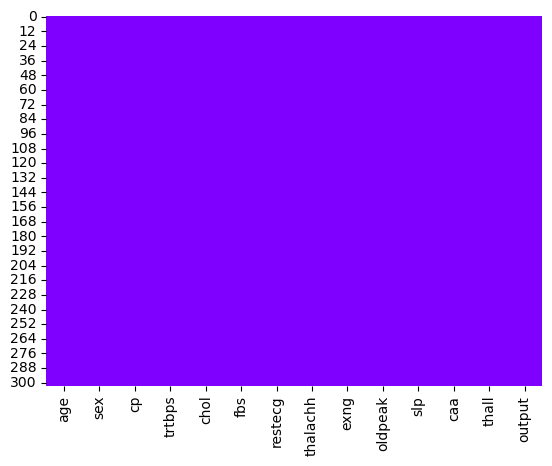

In [6]:
sns.heatmap(data.isnull(), cmap='rainbow', cbar=False)

 **NO NUll values present in the data!**

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trtbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalachh,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exng,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


In [8]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [9]:
categ_col = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
num_col = data.columns.to_list()
for col in categ_col:
    num_col.remove(col)
num_col.remove('output')
target = 'output'
print(categ_col)
print(num_col)

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


### Exploratory Data Analysis

#### correlation matrix :

In [10]:
import plotly.express as px
fig = px.imshow(data.corr(), title='the correlation plot fo the heart attack prediction')
fig.show()

**lighter shades represents positive correlation,  darker shades represents negative correlation 
we observed that the attributes exng, oldpeak, caa and thall have a highly negative correlation with the output**

#### Distribution of categorical features :

In [11]:
fig = px.histogram(data, x='output',
                   color='sex',
                   title='Distribution of the output with respect to sex column',
                   barmode='group')
fig.show()

In [12]:
fig = px.histogram(data, x='sex',
                   color='sex',
                   title='sex ratio in the data')
fig.show()

In [13]:
fig = px.histogram(data, x='cp',
                   color='sex',
                   title='Distribution of the chest_pain with respect to sex column')
fig.show()

In [14]:
fig = px.histogram(data, x='exng',
                   color='sex',
                   title='Distribution of the exercise induced angina with respect to sex column')
fig.show()

In [15]:
fig = px.histogram(data, x='restecg',
                   color = 'restecg',
                   title='Distribution of the RestECG',
                   barmode='overlay')
fig.show()

#### Multiple pairwise bivariate distribution

[]

<Figure size 2000x1500 with 0 Axes>

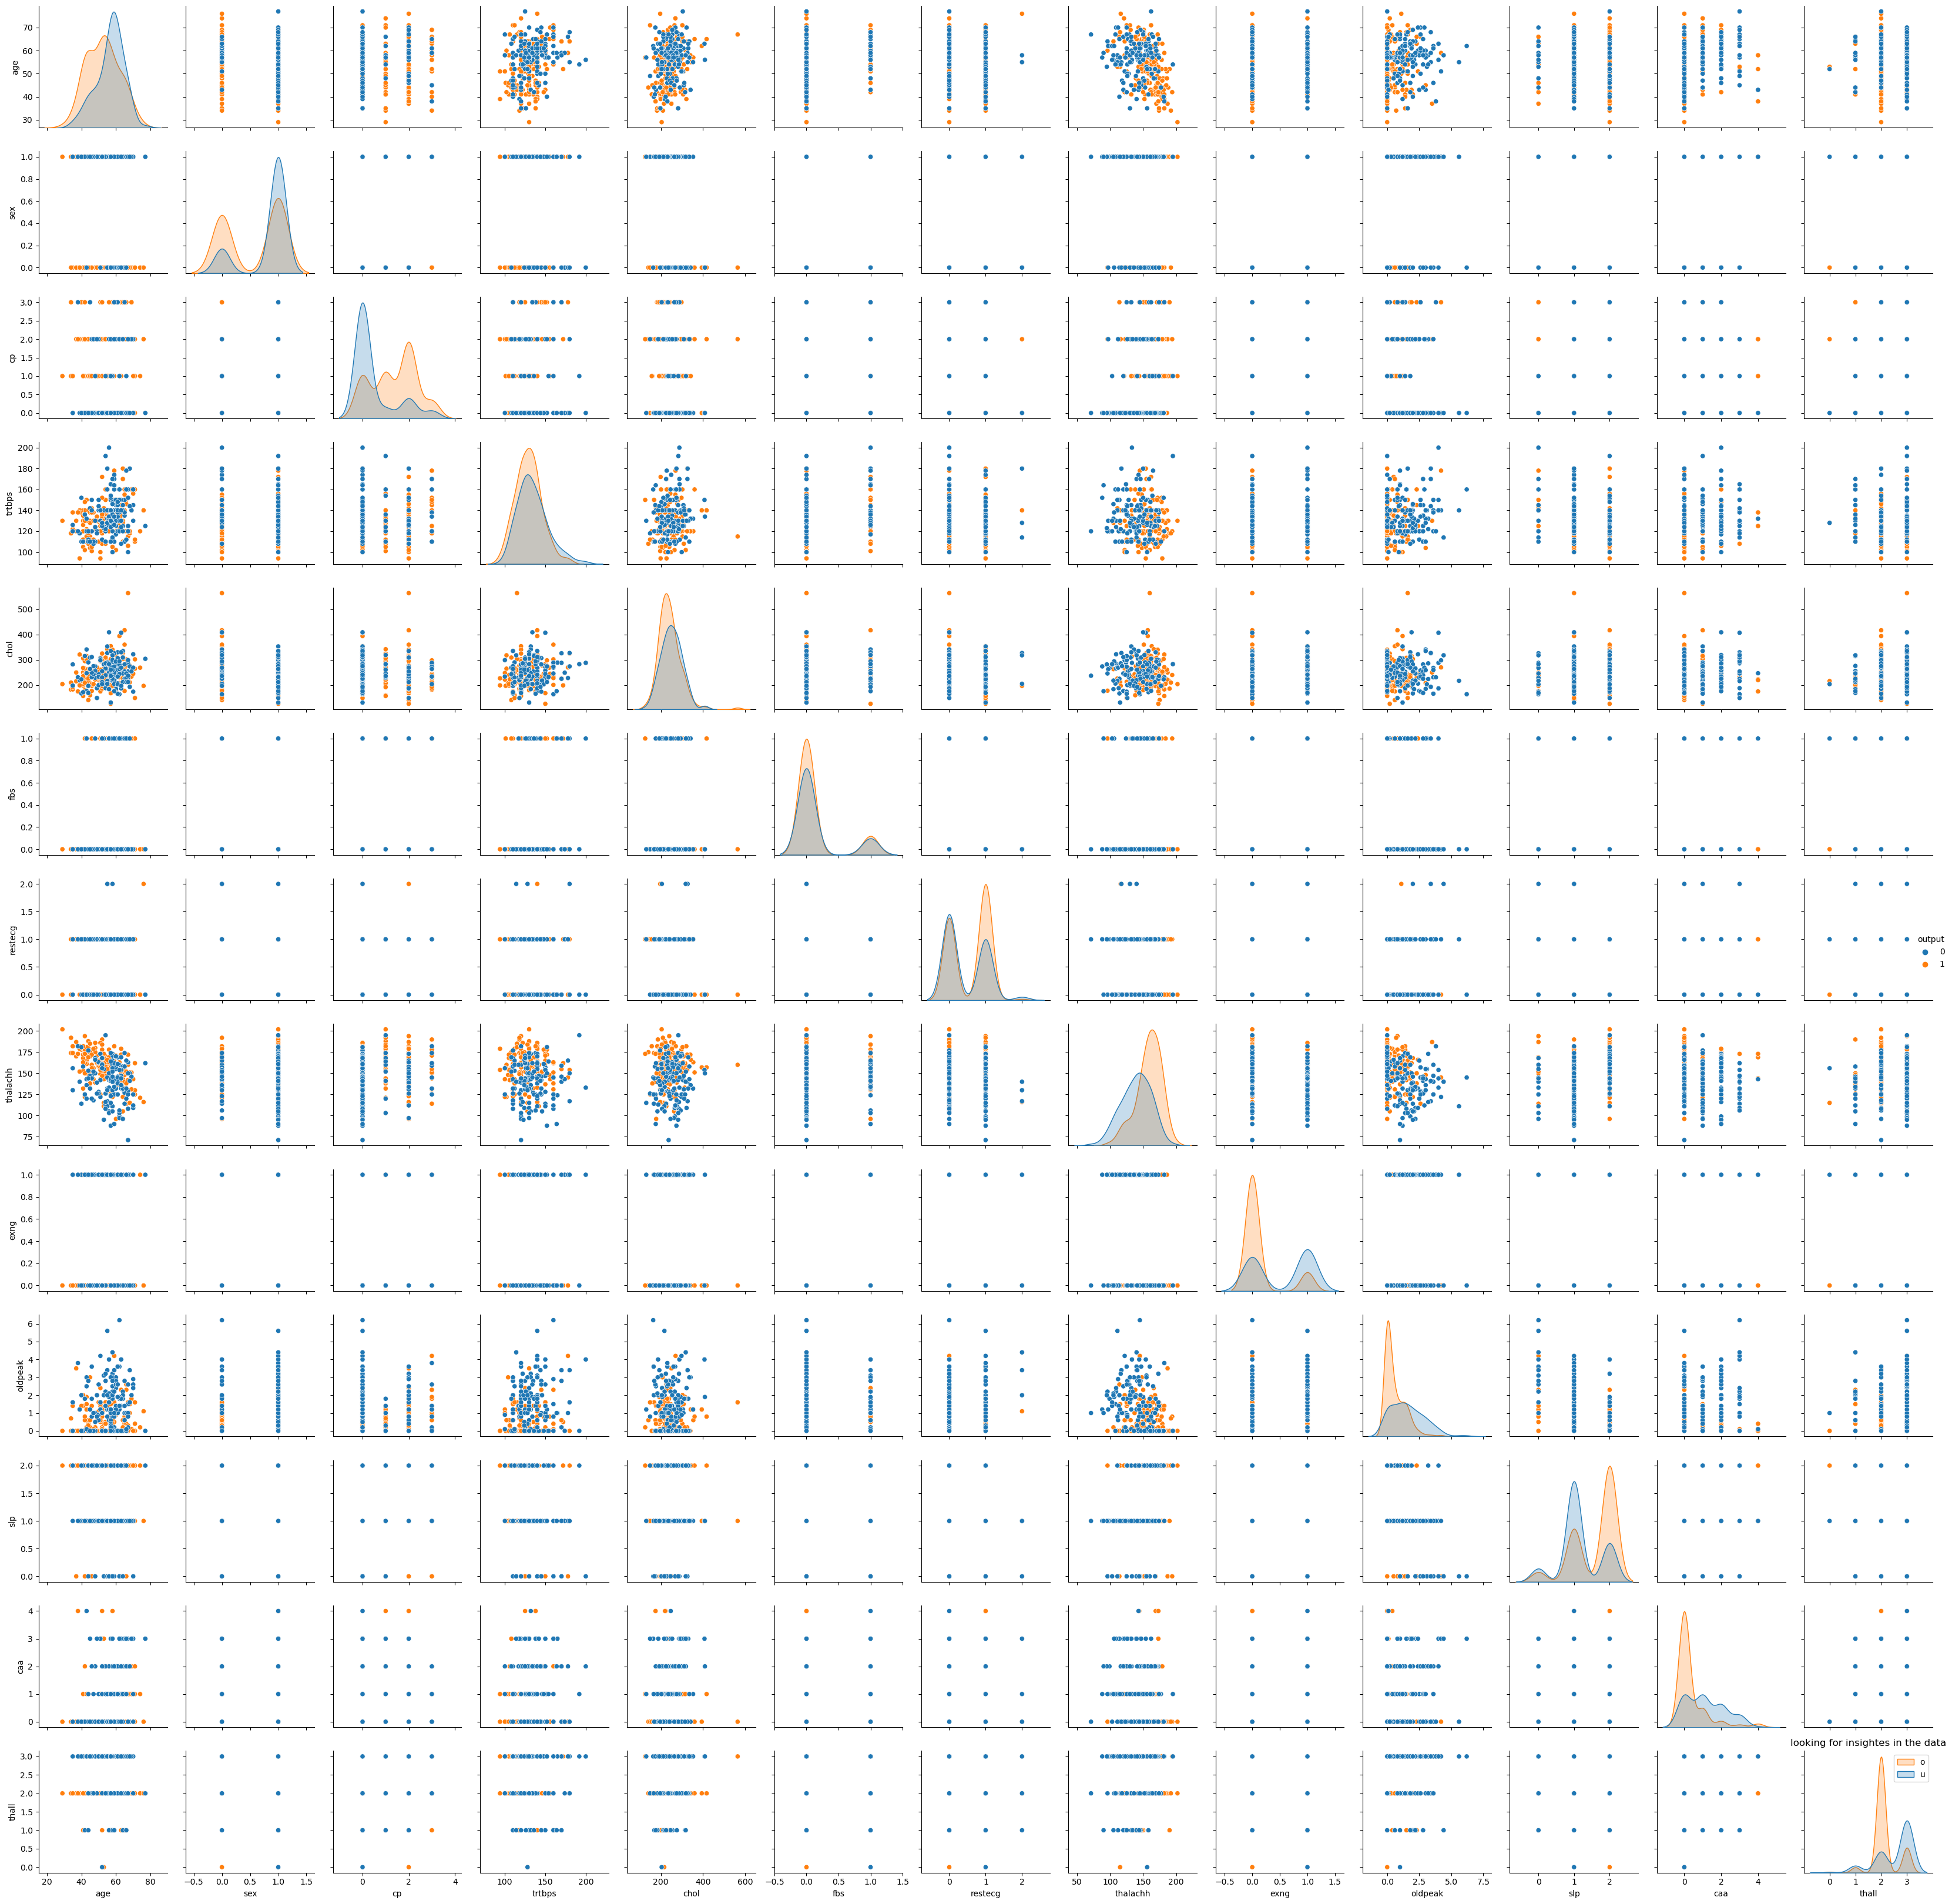

In [16]:
plt.figure(figsize=(20,15))
sns.pairplot(data, hue='output')
plt.title('looking for insightes in the data')
plt.legend('output')
plt.tight_layout()
plt.plot()

**Check Linearity of the variables 
its good practise to plot the distribution graph and look for skewness of the features**

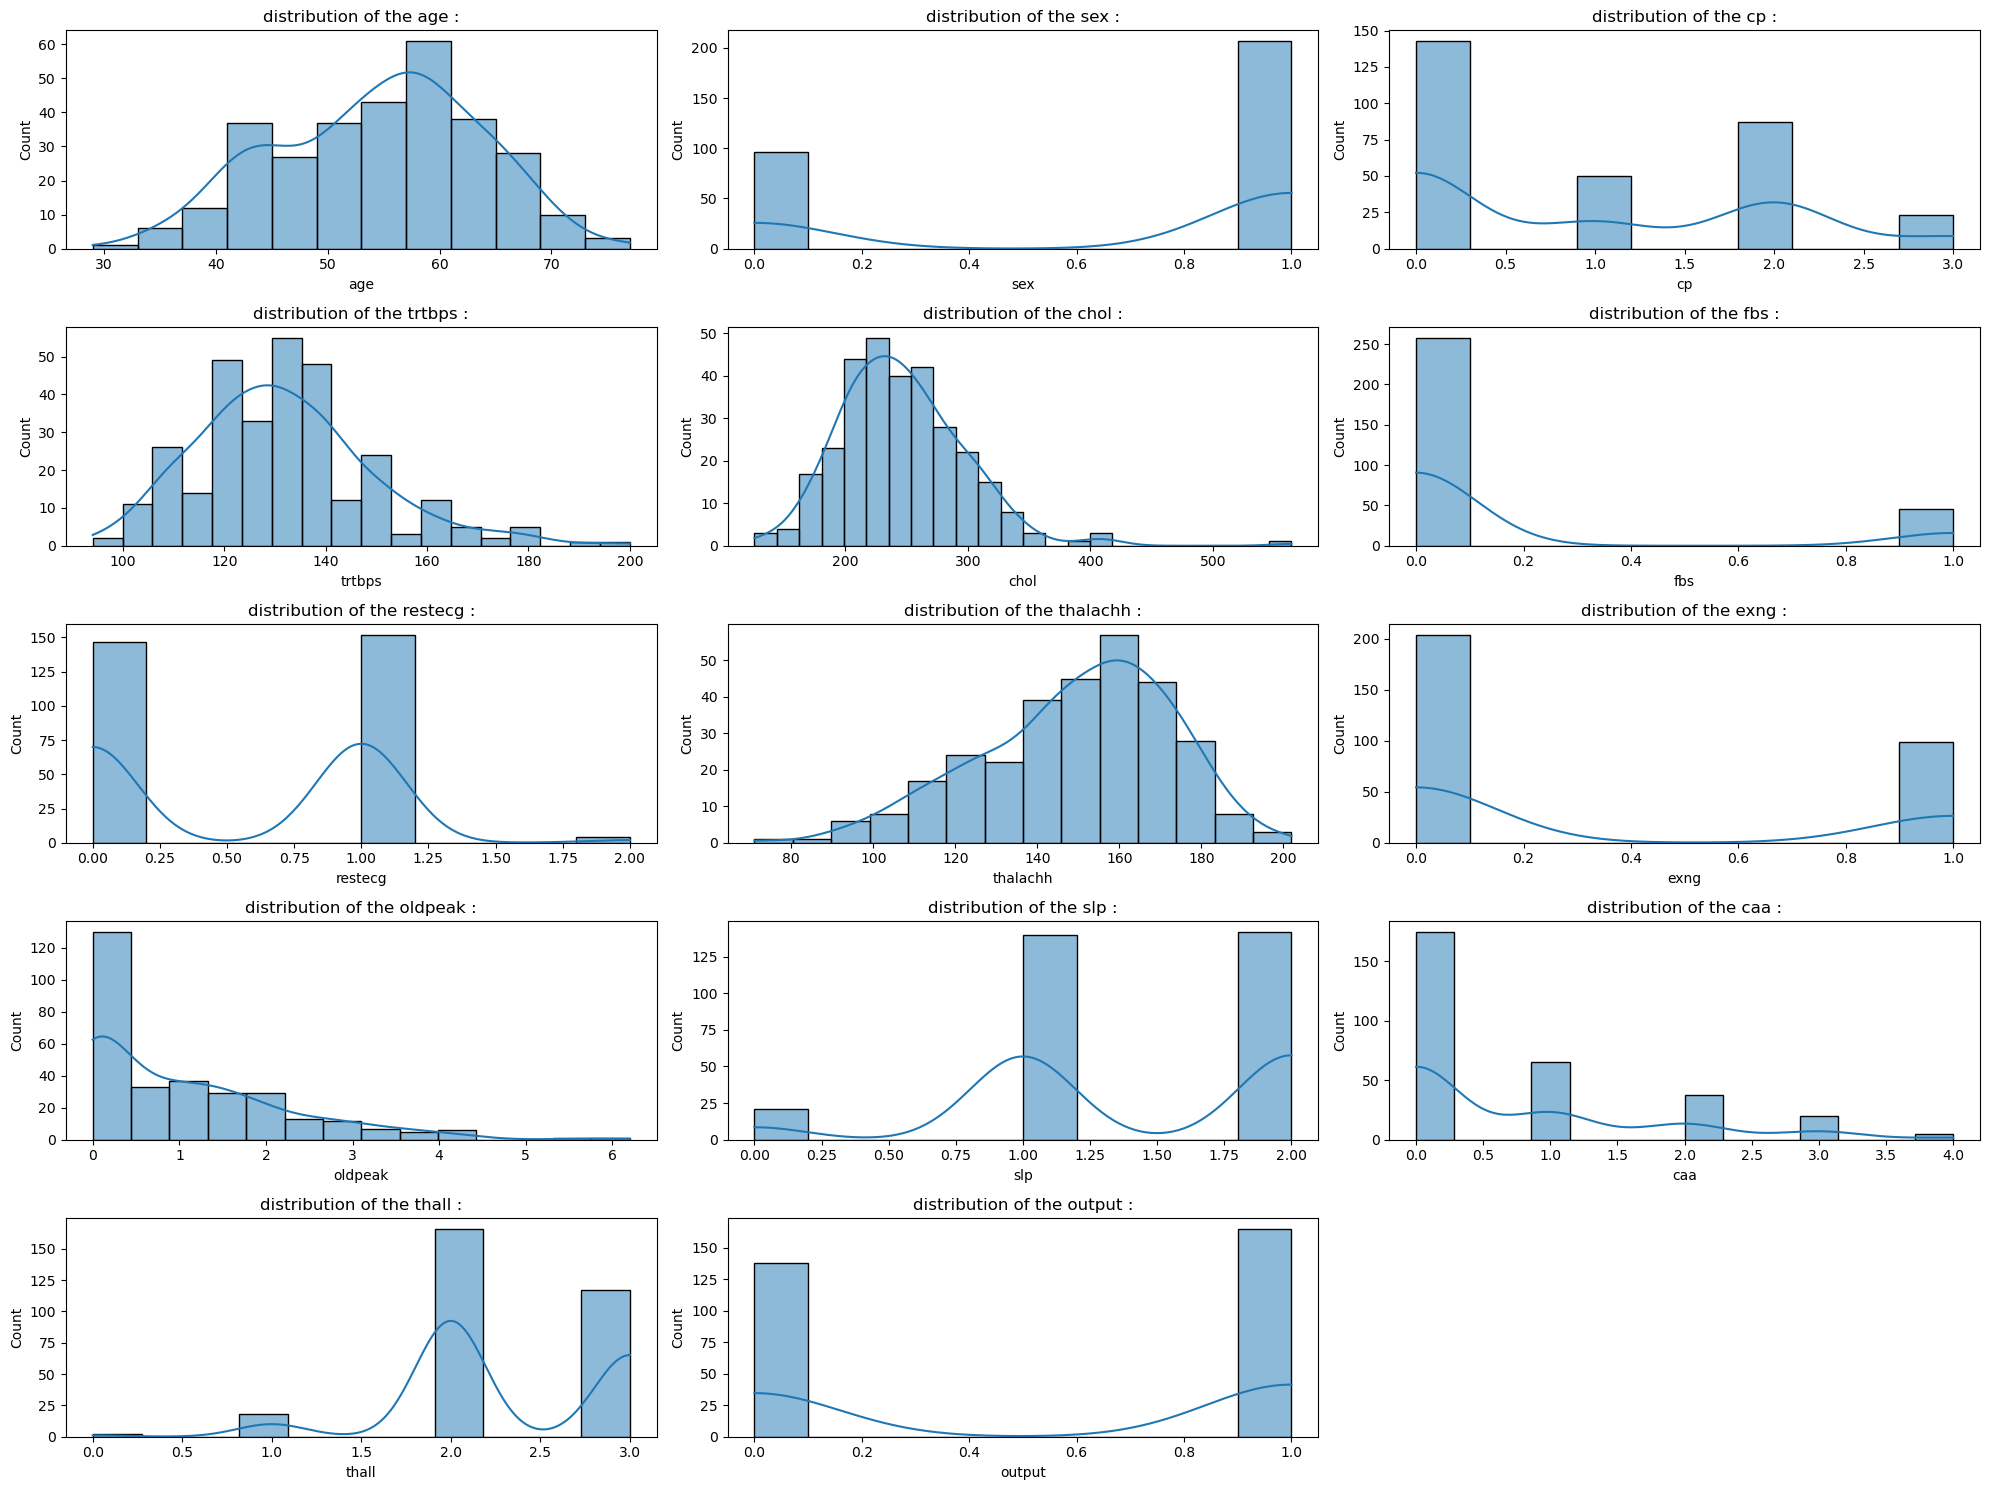

In [17]:
plt.figure(figsize=(20,15))
for i, col in enumerate(data.columns, 1):
    plt.subplot(5,3,i)
    plt.title(f'distribution of the {col} :')
    sns.histplot(data[col], kde=True)
    plt.tight_layout()
    plt.plot()

#### Box plot
**shows the distribution of quantitative data in a way that facilitates comparisons between variables**

In [18]:
fig = px.box(data, y='age', x='output',title=f'distribution of the age')
fig.show()

In [19]:
fig = px.box(data, y='trtbps', color='sex', title=f'distribution of the resting blood pressure')
fig.show()

In [20]:
fig = px.box(data, y='chol', title=f'distribution of the cholestrol')
fig.show()

In [21]:
fig = px.box(data, y='oldpeak', title=f'distribution of the oldpeak')
fig.show()

In [22]:
fig = px.box(data, y='thalachh', title=f'distribution of the thalachh')
fig.show()

### Feature Engineering

#### Data scaling :

- Normalization
**is done for features whose data does not display normal distribition**
- Standardization
**is carried out for features that are normally distribution**

- oldpeak : is displayed a right skewed data distribution
- age, chol, trtbps and thalachh : are normally distribution

- we scale our data before employing a Non Tree Based Algorithms

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

ms = MinMaxScaler() # for normalization
scale = StandardScaler() # for standardization

data_copy = data.copy()

data_copy['oldpeak'] = ms.fit_transform(data_copy[['oldpeak']])
data_copy['age'] = scale.fit_transform(data_copy[['age']])
data_copy['trtbps'] = scale.fit_transform(data_copy[['trtbps']])
data_copy['thalachh'] = scale.fit_transform(data_copy[['thalachh']])
data_copy['chol'] = scale.fit_transform(data_copy[['chol']])


data_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.95,1,3,0.76,-0.26,1,0,0.02,0,0.37,0,0,1,1
1,-1.92,1,2,-0.09,0.07,0,1,1.63,0,0.56,0,0,2,1
2,-1.47,0,1,-0.09,-0.82,0,0,0.98,0,0.23,2,0,2,1
3,0.18,1,1,-0.66,-0.20,0,1,1.24,0,0.13,2,0,2,1
4,0.29,0,0,-0.66,2.08,0,1,0.58,1,0.10,2,0,2,1


#### Feature selection for categorical features :

##### Chi Squared Test :

In [31]:
from sklearn.feature_selection import SelectKBest, chi2

features_non_tree = data_copy.loc[:, categ_col[:]]
features_tree = data.loc[:, categ_col[:]]
y_target = data_copy.loc[:, target]

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features_non_tree, y_target)

feature_score = pd.DataFrame(data=fit.scores_, index=list(features_non_tree.columns), columns=['Chi Squared Score'])
feature_score.sort_values(ascending=False, by='Chi Squared Score')

,Chi Squared Score
caa,66.44
cp,62.60
exng,38.91
slp,9.80
sex,7.58
thall,5.79
restecg,2.98
fbs,0.20


- Except restecg and fbs , all the remaining categorical features are pretty important for predicting the heart diseases

#### Feature selection for Numerical features :

##### ANOVA Test :

In [36]:
from sklearn.feature_selection import f_classif

features_non_tree = data_copy.loc[:,num_col[:]]
features_tree = data.loc[:, num_col[:]]
y_target = data_copy.loc[:, target]

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features_non_tree, y_target)

feature_score = pd.DataFrame(data=fit.scores_, index=list(features_non_tree.columns), columns=['ANOVA Score'])
feature_score.sort_values(ascending=False, by='ANOVA Score')

,ANOVA Score
oldpeak,68.55
thalachh,65.12
age,16.12
trtbps,6.46
chol,2.20


- we will leave out the chol from the modeling part and take the remaing features

### Modeling

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, plot_roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import GridSearchCV, cross_val_score

In [39]:
features_non_tree = data_copy[data_copy.columns.drop(['chol', 'fbs', 'restecg', 'output'])].values
features_tree = data[data.columns.drop(['chol', 'fbs', 'restecg', 'output'])].values

target = data_copy['output'].values

### Non-Tree-Based-Models

In [120]:
x_train, x_test, y_train, y_test = train_test_split(features_non_tree, target, test_size=0.2, random_state=0)

In [43]:
def model(classifier):

    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test, y_pred)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,y_pred)))

    plot_roc_curve(classifier, x_test, y_test)
    plt.title('Roc_Auc_plot')
    plt.show()

In [44]:
def model_evaluation(classifier):

    cm = confusion_matrix(y_test, classifier.predict(x_test))
    print('confusion_matrix is :')
    print(cm)

    print(classification_report(y_test, classifier.predict(x_test)))

#### Logistic Regression :

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
parameters = [{
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}]
gsv = GridSearchCV(log_model, param_grid=parameters, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0),
                   verbose=True, n_jobs=-1)
best_gsv = gsv.fit(x_train, y_train)

In [72]:
print(best_gsv.best_params_)
print(best_gsv.score(x_train, y_train))

{'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8347107438016529


In [73]:

model_1 = LogisticRegression(random_state=0, C=.23, penalty='l2', max_iter=100, solver='lbfgs')

Accuracy :  88.52%
Cross Validation Score :  89.45%
ROC_AUC Score :  88.18%


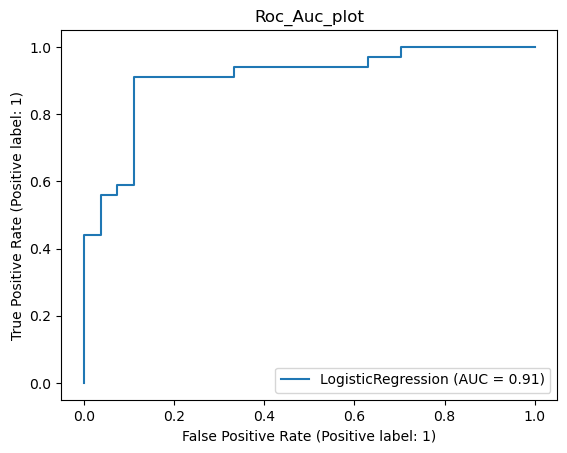

In [74]:
model(model_1)

In [75]:
model_evaluation(model_1)

confusion_matrix is :
[[23  4]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



#### Suport Vector Classifier :

In [86]:
from sklearn.svm import SVC
svc_model = SVC()
tuning_params = np.linspace(0.01,100,100)
tuning_params = [round(i,2) for i in tuning_params]
parameters = [{
    'C': tuning_params,
    'gamma': tuning_params,
    'kernel': ['rbf', 'linear']
}]
gsv = GridSearchCV(svc_model, param_grid=parameters, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0),
                   verbose=True, n_jobs=-1)
best_gsv = gsv.fit(x_train, y_train)

Fitting 15 folds for each of 20000 candidates, totalling 300000 fits


In [92]:
print(best_gsv.best_params_)

{'C': 6.07, 'gamma': 0.01, 'kernel': 'rbf'}


In [88]:
model_2 = SVC(kernel='rbf', gamma=0.01, C=6.07)

Accuracy :  85.25%
Cross Validation Score :  89.32%
ROC_AUC Score :  84.48%


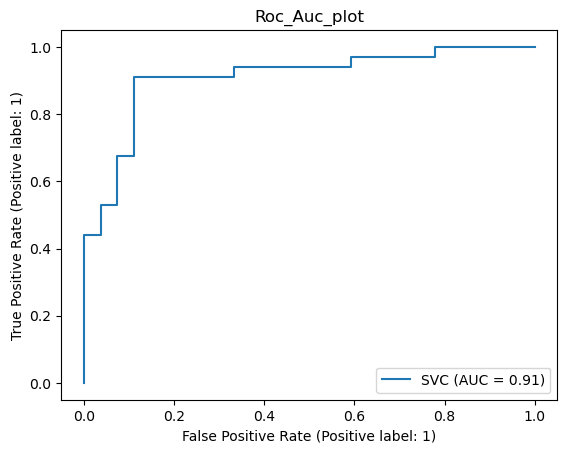

In [89]:
model(model_2)

In [93]:
model_evaluation(model_2)

confusion_matrix is :
[[21  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



#### K-nearest Neighbors Clsssifier :

In [94]:
from sklearn.neighbors import KNeighborsClassifier

# calculating the accuracy of the models with different of K
mean_acc = np.zeros(20)
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    y_hat = knn.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_test, y_hat)
mean_acc

array([0.83606557, 0.73770492, 0.78688525, 0.78688525, 0.81967213,
       0.81967213, 0.83606557, 0.80327869, 0.81967213, 0.81967213,
       0.80327869, 0.83606557, 0.81967213, 0.83606557, 0.80327869,
       0.81967213, 0.80327869, 0.81967213, 0.81967213, 0.81967213])

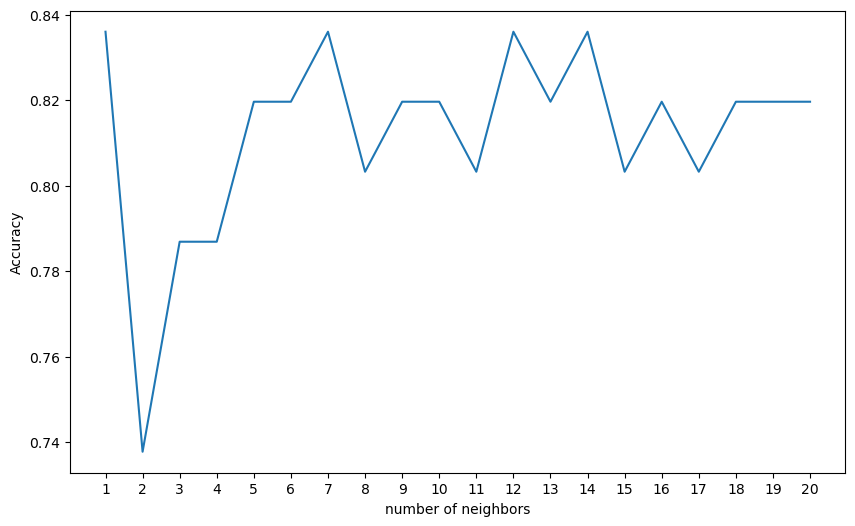

In [95]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),mean_acc)
plt.xticks(np.arange(1,21,1.0))
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**There are a some of values(6,7,12,14,15) where the accuracy is the highest.**

In [ ]:
knn_model = KNeighborsClassifier()
parameters = [{
    'n_neighbors': np.arange(6,17,1),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}]
gsv = GridSearchCV(knn_model, param_grid=parameters, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0),
                   verbose=True, n_jobs=-1)
best_gsv = gsv.fit(x_train, y_train)

In [98]:
print(best_gsv.best_params_)

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}


In [99]:
model_3 = KNeighborsClassifier(n_neighbors=8, metric='manhattan', weights='distance')

Accuracy :  85.25%
Cross Validation Score :  88.81%
ROC_AUC Score :  84.10%


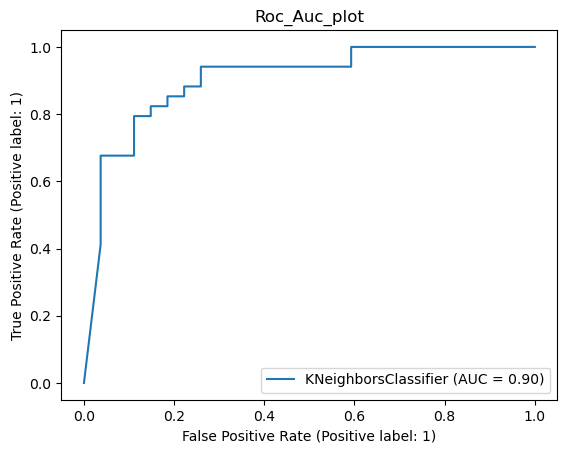

In [100]:
model(model_3)

In [101]:
model_evaluation(model_3)

confusion_matrix is :
[[20  7]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



### Tree-Based-Models

In [128]:
x_train, x_test, y_train, y_test = train_test_split(features_tree, target, test_size=0.2, random_state=0)

#### Descion Tree :

In [129]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
parameters = [{
    'max_depth': np.arange(2,21,1),
    'min_samples_leaf': np.arange(5,100,5),
    'criterion': ['gini', 'entropy']
}]
gsv = GridSearchCV(tree_model, param_grid=parameters, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0),
                   verbose=True, n_jobs=-1)
best_gsv = gsv.fit(x_train, y_train)

Fitting 15 folds for each of 722 candidates, totalling 10830 fits


In [130]:
print(best_gsv.best_params_)

{'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 20}


In [135]:
model_4 = DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=20, random_state=0)

Accuracy :  81.97%
Cross Validation Score :  86.59%
ROC_AUC Score :  82.30%


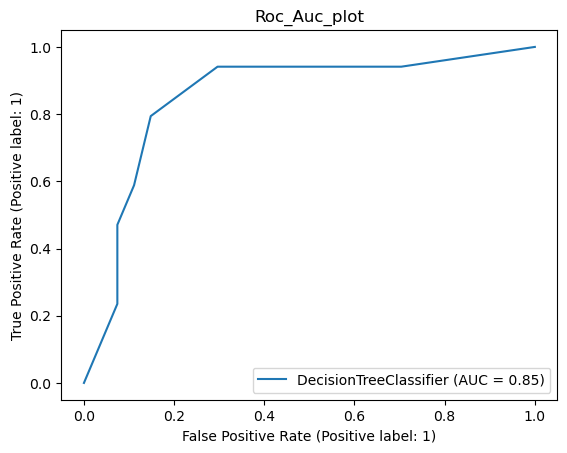

In [136]:
model(model_4)

In [137]:
model_evaluation(model_4)

confusion_matrix is :
[[23  4]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



#### Random Forest :

In [141]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier()
parameters = [{
    'n_estimators': [5,20,30,40,50,100],
    'max_depth': np.arange(10,121,10),
    'min_samples_leaf': np.arange(1,20,2),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}]
gsv = GridSearchCV(random_model, param_grid=parameters, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0),
                   verbose=True, n_jobs=-1)
best_gsv = gsv.fit(x_train, y_train)

Fitting 15 folds for each of 2880 candidates, totalling 43200 fits


In [142]:
print(best_gsv.best_params_)

{'bootstrap': False, 'max_depth': 90, 'max_features': 'auto', 'min_samples_leaf': 9, 'n_estimators': 30}


In [151]:
model_5 = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=90,
                                 max_features='auto', min_samples_leaf=9, bootstrap=False, random_state=0)

Accuracy :  83.61%
Cross Validation Score :  90.58%
ROC_AUC Score :  83.39%


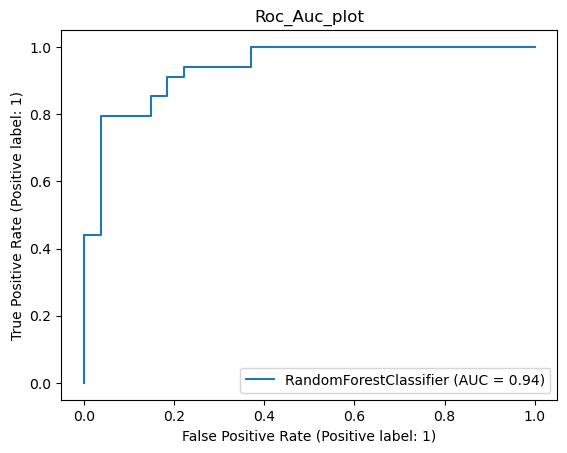

In [155]:
model(model_5)

In [156]:
model_evaluation(model_5)

confusion_matrix is :
[[22  5]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### Alogrithm Results Table :


|Sr. No.|ML Algorithm|Accuracy|Cross Validation Score|ROC AUC Score|
|-|-|-|-|-|
|1|Logistic Regression|88.52%|89.45%|88.18%|
|2|Support Vector Classifier|85.25%|89.32%|84.48%
|3|Decision Tree Classifier|81.97%|86.59%|82.30%|
|4|Random Forest Classifier|83.61%|90.58%|83.39%|
|5|K-Nearest Neighbors Classfier|85.25%|88.81%|84.10%|

- **Thank You**